TITANIC CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

Variable Notes


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
display(df_train.shape, df_test.shape)

display(df_train.info(), df_test.info())

(891, 12)

(418, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

None

None

In [4]:
display(df_train.head(), df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
display(df_train.describe(), df_test.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
display(df_train.describe(include="O"), df_test.describe(include="O"))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


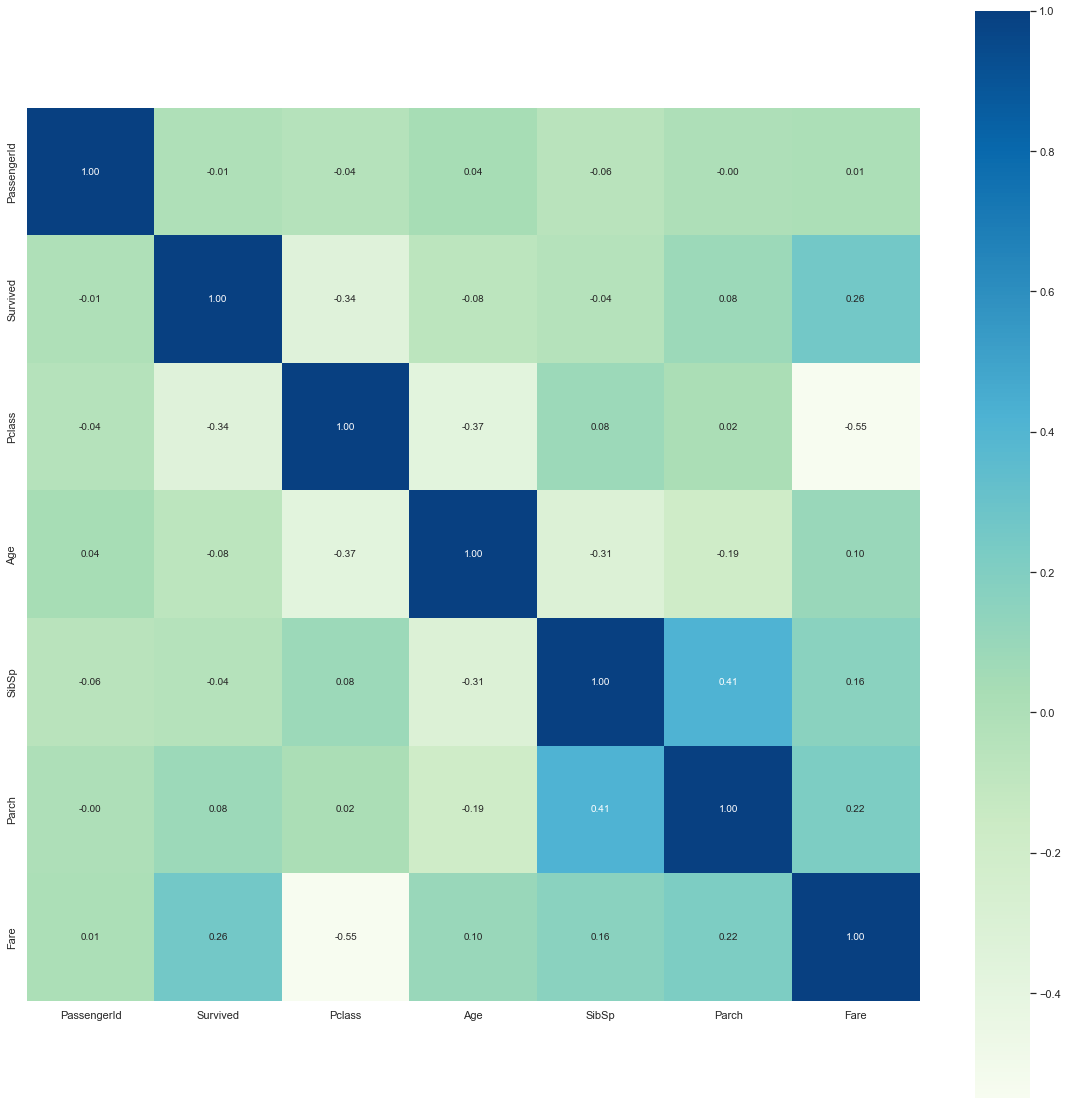

In [7]:
corr_mat = df_train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
g = sns.heatmap(corr_mat, cmap="GnBu", annot=True, fmt=".2f", square=True)

In [8]:
display(df_train.isnull().sum(), df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

In [10]:
display(df_train.isnull().sum(), df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

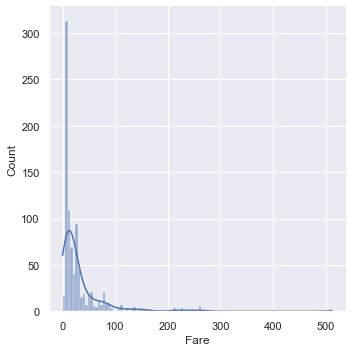

In [11]:
sns.displot(df_train["Fare"], kde=True);

In [12]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
display(df_train["Ticket"].nunique())
display(df_train["Ticket"].value_counts())

681

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [14]:
df_test["Fare"].fillna(df_test["Fare"].mean(), inplace=True)

In [15]:
display(df_train.isnull().sum(), df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_train.drop(["PassengerId"], axis=1, inplace=True)
df_test.drop(["PassengerId"], axis=1, inplace=True)

In [17]:
display(df_train.isnull().sum(), df_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [18]:
display(df_train["Cabin"].value_counts(), df_train["Cabin"].describe())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [19]:
train_null= pd.concat([df_train.count(), df_train.isnull().sum()], axis=1)
train_null.columns = ["Total", "Missing"]

test_null= pd.concat([df_test.count(), df_test.isnull().sum()], axis=1)
test_null.columns = ["Total", "Missing"]

display(train_null, test_null)

,Total,Missing
Survived,891,0
Pclass,891,0
Name,891,0
Sex,891,0
Age,714,177
SibSp,891,0
Parch,891,0
Ticket,891,0
Fare,891,0
Cabin,204,687


,Total,Missing
Pclass,418,0
Name,418,0
Sex,418,0
Age,332,86
SibSp,418,0
Parch,418,0
Ticket,418,0
Fare,418,0
Cabin,91,327
Embarked,418,0


In [20]:
train_null["%Missing"] = train_null["Missing"] / train_null["Total"].max() * 100
test_null["%Missing"] = test_null["Missing"] / test_null["Total"].max() * 100

In [21]:
pd.options.display.float_format = '{:,.2f}'.format

display(train_null, test_null)

,Total,Missing,%Missing
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00
Fare,891,0,0.00
Cabin,204,687,77.10


,Total,Missing,%Missing
Pclass,418,0,0.00
Name,418,0,0.00
Sex,418,0,0.00
Age,332,86,20.57
SibSp,418,0,0.00
Parch,418,0,0.00
Ticket,418,0,0.00
Fare,418,0,0.00
Cabin,91,327,78.23
Embarked,418,0,0.00


In [22]:
df_train.drop(["Cabin"], axis=1, inplace=True)
df_test.drop(["Cabin"], axis=1, inplace=True)

In [23]:
display(df_train["Name"].nunique(), df_test["Name"].nunique())

df_train.drop(["Name"], axis=1, inplace=True)
df_test.drop(["Name"], axis=1, inplace=True)

891

418

In [24]:
display(df_train.isnull().sum(), df_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
dtype: int64

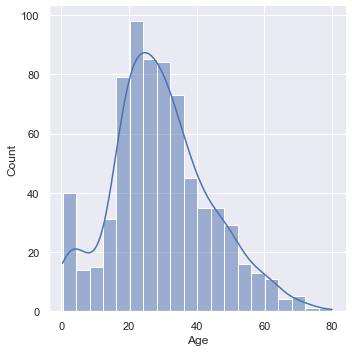

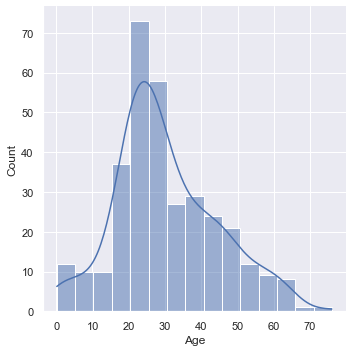

In [25]:
sns.displot(df_train["Age"], kde=True); sns.displot(df_test["Age"], kde=True);

In [26]:
col_list = df_train.columns.values.tolist()

col_list

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [27]:
for col in col_list:
    print(f"{col}:", df_train[col].describe())
    print("\n")

Survived: count   891.00
mean      0.38
std       0.49
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: Survived, dtype: float64


Pclass: count   891.00
mean      2.31
std       0.84
min       1.00
25%       2.00
50%       3.00
75%       3.00
max       3.00
Name: Pclass, dtype: float64


Sex: count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Age: count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64


SibSp: count   891.00
mean      0.52
std       1.10
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       8.00
Name: SibSp, dtype: float64


Parch: count   891.00
mean      0.38
std       0.81
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       6.00
Name: Parch, dtype: float64


Ticket: count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object


Fare: count  

In [28]:
df_train["Sex"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)
df_test["Sex"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)

# 0 = male, 1 = female


In [29]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df_train["Embarked"].replace(to_replace=["S", "C", "Q"], value=[0, 1, 2], inplace=True)
df_test["Embarked"].replace(to_replace=["S", "C", "Q"], value=[0, 1, 2], inplace=True)

# 0 = S, 1 = C, 2 = Q

In [31]:
display(df_train.head(), df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.00,1,0,A/5 21171,7.25,0
1,1,1,1,38.00,1,0,PC 17599,71.28,1
2,1,3,1,26.00,0,0,STON/O2. 3101282,7.92,0
3,1,1,1,35.00,1,0,113803,53.10,0
4,0,3,0,35.00,0,0,373450,8.05,0


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,34.50,0,0,330911,7.83,2
1,3,1,47.00,1,0,363272,7.00,0
2,2,0,62.00,0,0,240276,9.69,2
3,3,0,27.00,0,0,315154,8.66,0
4,3,1,22.00,1,1,3101298,12.29,0


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [33]:
display("Sex:", df_train["Survived"].corr(df_train["Sex"]))
display("Embarked:", df_train["Survived"].corr(df_train["Embarked"]))

'Sex:'

0.5433513806577551

'Embarked:'

0.10681138570891943

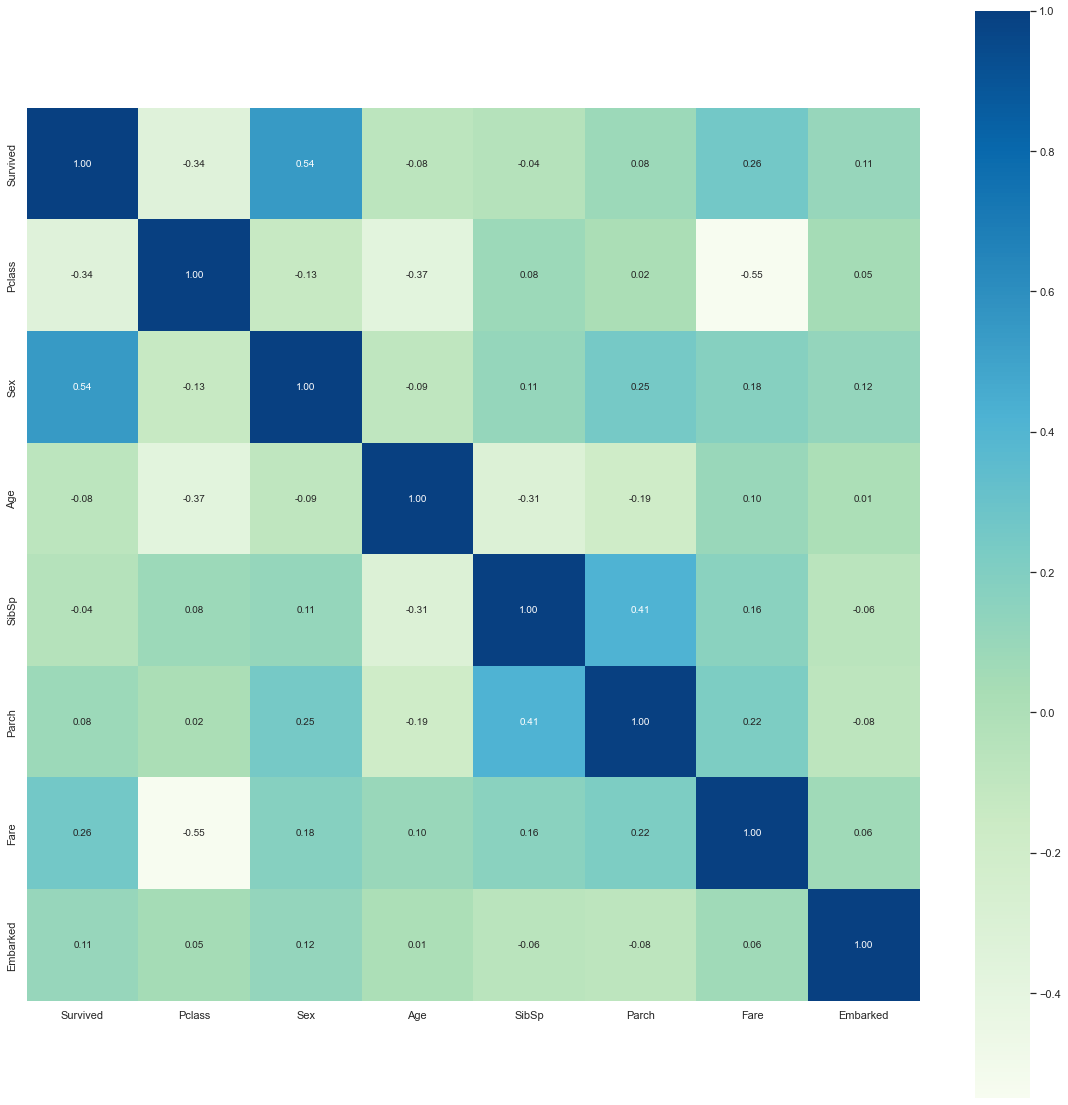

In [34]:
ax, fig = plt.subplots(figsize=(20, 20))
g = sns.heatmap(df_train.corr(), cmap="GnBu", annot=True, square=True, fmt=".2f");

In [35]:
display(df_train["Ticket"].value_counts(), df_train["Ticket"].nunique())

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

681

In [36]:
df_train["Ticket"].value_counts().index[:30]

Index(['347082', 'CA. 2343', '1601', '3101295', 'CA 2144', '347088',
       'S.O.C. 14879', '382652', 'LINE', 'PC 17757', '17421', '349909',
       '113760', '4133', '113781', 'W./C. 6608', '2666', '19950', '347077',
       'C.A. 31921', 'PC 17572', 'C.A. 34651', '363291', 'F.C.C. 13529',
       '345773', '248727', '24160', '29106', 'SC/Paris 2123', '35273'],
      dtype='object')

In [37]:
ticket_list = df_train["Ticket"].value_counts().index[:30].tolist()

ticket_list

['347082',
 'CA. 2343',
 '1601',
 '3101295',
 'CA 2144',
 '347088',
 'S.O.C. 14879',
 '382652',
 'LINE',
 'PC 17757',
 '17421',
 '349909',
 '113760',
 '4133',
 '113781',
 'W./C. 6608',
 '2666',
 '19950',
 '347077',
 'C.A. 31921',
 'PC 17572',
 'C.A. 34651',
 '363291',
 'F.C.C. 13529',
 '345773',
 '248727',
 '24160',
 '29106',
 'SC/Paris 2123',
 '35273']

In [38]:
for ticket in ticket_list:
    print(df_train[df_train["Ticket"]==ticket])

     Survived  Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  Embarked
13          0       3    0 39.00      1      5  347082 31.27         0
119         0       3    1  2.00      4      2  347082 31.27         0
541         0       3    1  9.00      4      2  347082 31.27         0
542         0       3    1 11.00      4      2  347082 31.27         0
610         0       3    1 39.00      1      5  347082 31.27         0
813         0       3    1  6.00      4      2  347082 31.27         0
850         0       3    0  4.00      4      2  347082 31.27         0
     Survived  Pclass  Sex  Age  SibSp  Parch    Ticket  Fare  Embarked
159         0       3    0  NaN      8      2  CA. 2343 69.55         0
180         0       3    1  NaN      8      2  CA. 2343 69.55         0
201         0       3    0  NaN      8      2  CA. 2343 69.55         0
324         0       3    0  NaN      8      2  CA. 2343 69.55         0
792         0       3    1  NaN      8      2  CA. 2343 69.55         0


In [39]:
# ticket => Fare & Embarked

df_train.drop(["Ticket"], axis=1, inplace=True)
df_test.drop(["Ticket"], axis=1, inplace=True)

In [40]:
display(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  


None

None

In [41]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

In [42]:
df_train.isnull().sum(), df_test.isnull().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = df_train.drop(["Survived"], axis=1), df_train["Survived"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
LR_clf = LogisticRegression()
LR_clf.fit(X, y)

LogisticRegression()

In [45]:
y_test = LR_clf.predict(df_test)

In [46]:
acc_logreg = round(LR_clf.score(X, y) * 100, 2)
acc_logreg

80.47

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

y_test = rf_clf.predict(df_test)

acc_random_forest = round(rf_clf.score(X, y) * 100, 2)
acc_random_forest

98.2

In [48]:
index_sub = pd.read_csv("./data/test.csv")
index_sub = index_sub["PassengerId"]

In [49]:
result = pd.concat([index_sub, pd.Series(y_test)], axis=1, ignore_index=True)

result.columns = ["PassengerId", "Survived"]

In [50]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
result.to_csv("titanic_classification_jimmy_son.csv", index=False)